# S03 T02: Visualització gràfica de Múltiples variables

Descripció:
Anem a practicar i a familiaritzar-nos amb la Visualització gràfica de Múltiples variables.
## NIVELL 2
### Exercici 2: Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat


<div class="alert alert-block alert-info">
    <font size="5"><center><G><u>Fonaments estadístics per a la ciència de dades</u></b></center></font>

\begin{align*}ANNA\:MASÓ\end{align*}

\begin{align*}Maig\:2022\end{align*}

Cridem a les llibreries que necessitem i importem el dataset "movies.dat".
El document que se'ns dona és un .dat, per tant primer l'obro amb un editor de text i el guardo com a .txt.
Seguidament l'importo amb la llibreria pandas al mateix moment que li començo a donar una mica de forma.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

movies = pd.read_table("C:\\Users\\Anna\\DataScience\\SPRINTS\\SPRINT 3\\Sprint 3 T02\\movies.txt", encoding = "ISO-8859-1", engine='python', sep="\::", header=None)

# els punts de "encoding" i "engine" els he posat per solventar errors que em sortien a l'importar l'arxiu txt

print(movies)

         0                             1     2                             3
0        1                    Toy Story   1995   Animation|Children's|Comedy
1        2                      Jumanji   1995  Adventure|Children's|Fantasy
2        3             Grumpier Old Men   1995                Comedy|Romance
3        4            Waiting to Exhale   1995                  Comedy|Drama
4        5  Father of the Bride Part II   1995                        Comedy
...    ...                           ...   ...                           ...
3878  3948             Meet the Parents   2000                        Comedy
3879  3949          Requiem for a Dream   2000                         Drama
3880  3950                    Tigerland   2000                         Drama
3881  3951             Two Family House   2000                         Drama
3882  3952               Contender, The   2000                Drama|Thriller

[3883 rows x 4 columns]


Veiem que hem convertit el dataframe en diverses columnes, però que encara podríem fer alguna separació més, com per exemple, fer més treballable la columna de categoria i posar noms a les columnes.

In [2]:
# Primer donem nom a les columnes per a poder treballar-les pel nom i no per la posició

movies.columns = ["posicio", "titol", "any", "categoria"]

# Elimino la columna de la posició perquè no m'aporta res pel que vull fer

del(movies["posicio"])

print(movies)

                             titol   any                     categoria
0                       Toy Story   1995   Animation|Children's|Comedy
1                         Jumanji   1995  Adventure|Children's|Fantasy
2                Grumpier Old Men   1995                Comedy|Romance
3               Waiting to Exhale   1995                  Comedy|Drama
4     Father of the Bride Part II   1995                        Comedy
...                            ...   ...                           ...
3878             Meet the Parents   2000                        Comedy
3879          Requiem for a Dream   2000                         Drama
3880                    Tigerland   2000                         Drama
3881             Two Family House   2000                         Drama
3882               Contender, The   2000                Drama|Thriller

[3883 rows x 3 columns]


In [3]:
# Per modificar la columna de categoria, primer hem de saber quants tipus hi ha

tipusTot=set(movies.categoria) 
# print(tipusTot) #intento crear una llista però hauré d'iterar perquè no se m'imprimeixin totes les categories

tipus = set()  #creo llista buida
for x in movies.categoria:
    y = x.split ("|")    #vol dir que per cada vegada que una cel·la de la columna de categoria tingui més d'un tipus, aquest                          es divideixi per la barra que la separa
    for w in y:
        tipus.add(w)     #afegeixo cada valor nou a la llista
tipus=list(tipus)
tipus

# primera vegada que busco ajuda al github del curs abans de fer l'exercici perquè no sabia pas com fer-ho... però m'ha anat bé perquè he entès com fer-ho amb el doble bucle for

["Children's",
 'Animation',
 'War',
 'Mystery',
 'Film-Noir',
 'Romance',
 'Comedy',
 'Fantasy',
 'Sci-Fi',
 'Documentary',
 'Musical',
 'Thriller',
 'Western',
 'Crime',
 'Horror',
 'Action',
 'Drama',
 'Adventure']

In [4]:
# per seguir, fem de cada tipus una nova columna i així cada pel·lícula es podrà desglossar per cada una de les categories

for cat in tipus:
    categoria = movies['categoria']
    movies[cat] = categoria.str.contains(cat).astype(int)
    
print(movies)

                             titol   any                     categoria  \
0                       Toy Story   1995   Animation|Children's|Comedy   
1                         Jumanji   1995  Adventure|Children's|Fantasy   
2                Grumpier Old Men   1995                Comedy|Romance   
3               Waiting to Exhale   1995                  Comedy|Drama   
4     Father of the Bride Part II   1995                        Comedy   
...                            ...   ...                           ...   
3878             Meet the Parents   2000                        Comedy   
3879          Requiem for a Dream   2000                         Drama   
3880                    Tigerland   2000                         Drama   
3881             Two Family House   2000                         Drama   
3882               Contender, The   2000                Drama|Thriller   

      Children's  Animation  War  Mystery  Film-Noir  Romance  Comedy  ...  \
0              1          1    0 

Fem una mica de lectura i anàlisi estadístic bàsic per conèixer una mica el dataset i començar a treballar amb ell

In [5]:
# La mida del dataset

movies.shape

(3883, 21)

In [6]:
# El nom de les columnes

movies.columns

Index(['titol', 'any', 'categoria', 'Children's', 'Animation', 'War',
       'Mystery', 'Film-Noir', 'Romance', 'Comedy', 'Fantasy', 'Sci-Fi',
       'Documentary', 'Musical', 'Thriller', 'Western', 'Crime', 'Horror',
       'Action', 'Drama', 'Adventure'],
      dtype='object')

In [7]:
# Tipus de dades que trobem a cada columna

movies.dtypes

titol          object
any             int64
categoria      object
Children's      int32
Animation       int32
War             int32
Mystery         int32
Film-Noir       int32
Romance         int32
Comedy          int32
Fantasy         int32
Sci-Fi          int32
Documentary     int32
Musical         int32
Thriller        int32
Western         int32
Crime           int32
Horror          int32
Action          int32
Drama           int32
Adventure       int32
dtype: object

In [8]:
# Analitzem si hi ha nuls i on són

print(movies.isnull())

print("____________________________________________________________________________")

print(movies.count())

print("____________________________________________________________________________")

print(movies.isnull().sum())

# No hi ha cap nul, per tant no cal fer res més


      titol    any  categoria  Children's  Animation    War  Mystery  \
0     False  False      False       False      False  False    False   
1     False  False      False       False      False  False    False   
2     False  False      False       False      False  False    False   
3     False  False      False       False      False  False    False   
4     False  False      False       False      False  False    False   
...     ...    ...        ...         ...        ...    ...      ...   
3878  False  False      False       False      False  False    False   
3879  False  False      False       False      False  False    False   
3880  False  False      False       False      False  False    False   
3881  False  False      False       False      False  False    False   
3882  False  False      False       False      False  False    False   

      Film-Noir  Romance  Comedy  ...  Sci-Fi  Documentary  Musical  Thriller  \
0         False    False   False  ...   False        F

In [9]:
# Imprimim la descripció dels càlculs que ens fa l'operació describe() sobre les columnes que són numèriques

movies.describe()

,any,Children's,Animation,War,Mystery,Film-Noir,Romance,Comedy,Fantasy,Sci-Fi,Documentary,Musical,Thriller,Western,Crime,Horror,Action,Drama,Adventure
count,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000
mean,1986.066959,0.064641,0.027041,0.036827,0.027298,0.011331,0.121298,0.309039,0.017512,0.071079,0.032707,0.029359,0.126706,0.017512,0.054339,0.088334,0.129539,0.412825,0.072882
std,16.895690,0.245923,0.162224,0.188362,0.162973,0.105858,0.326515,0.462157,0.131187,0.256990,0.177891,0.168832,0.332686,0.131187,0.226715,0.283816,0.335839,0.492405,0.259976
min,1919.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1982.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div class="alert alert- alert-info">

***
  \begin{align*}SCATTERPLOT\end{align*}
   
    
***

Després de deividr totes les categories, anem a fer algun <span style=color:red>Scatterplot</span> amb elles i veure com en podem treure informació

In [10]:
# Primer vull saber una mica d'informació de les categories en general

movies.categoria.describe()


count      3883
unique      301
top       Drama
freq        843
Name: categoria, dtype: object

Text(0, 0.5, "Any d'estrena de la pel·lícula")

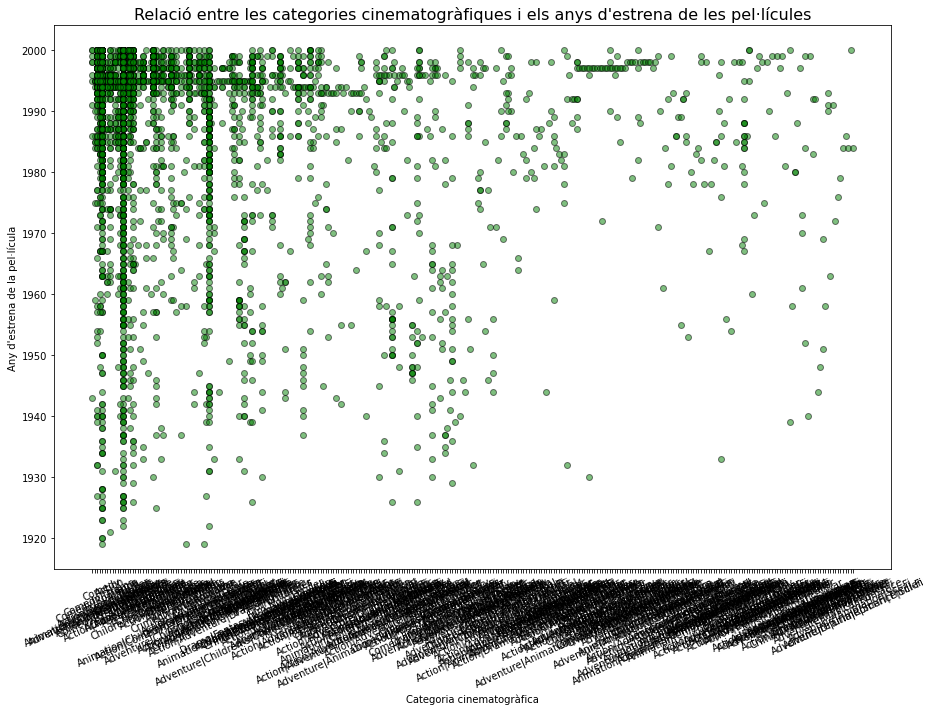

In [11]:
plt.figure(figsize=(15,10))

plt.scatter(data = movies,
            x = "categoria",
            y = "any", 
            s = 6*6,
            c = "green",
            alpha=0.5, 
            edgecolors='black');

plt.title("Relació entre les categories cinematogràfiques i els anys d'estrena de les pel·lícules", fontsize=16)
plt.xticks(rotation=25)  #fa rotar els noms de les x
plt.xlabel("Categoria cinematogràfica")
plt.ylabel("Any d'estrena de la pel·lícula")


En aquest gràfic veiem quantes pel·lícules es van estrenar per cada any i per cada categoria. El problema és que hi ha molta informació junta i no és molt còmode de llegir, per tant hem de buscar un tipus de gràfic més adient. 


<div class="alert alert- alert-info">

***
  \begin{align*}STACKED PLOT\end{align*}
   
    
***

He decidit utilitzar un  <span style=color:red>Stackedplot</span> perquè em permet representar més d'una categoria a cada any, pel que redueix la informació de cada categoria en un tros de barra i no ocupa tant lloc.

Text(0, 0.5, 'Quantitat de pel·lícules estrenades ')

<Figure size 1080x720 with 0 Axes>

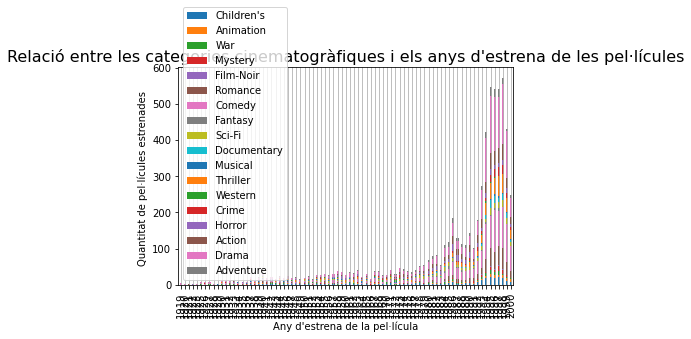

In [12]:
# Especifico que em separi les categories dins les barres de cada any i altres característiques del propi dibuix

x = movies.any
plt.figure(figsize=(15,10)) #no sé perquè no em funciona el canvi de tamany del dibuix

movies.groupby('any').sum().plot(kind='bar', stacked=True)

plt.grid(axis = "x")

plt.title("Relació entre les categories cinematogràfiques i els anys d'estrena de les pel·lícules", fontsize=16)
plt.xlabel("Any d'estrena de la pel·lícula")
plt.ylabel("Quantitat de pel·lícules estrenades ")


<div class="alert alert- alert-info">

***
  \begin{align*}PIE\end{align*}
   
    
***

Vull utilitzar un gràfic <span style=color:red>Pie</span> per mirar quantes pel·lícules s'han fet a cada any. Per fer-ho, primer imprimeixo els anys

In [13]:
movies["any"].unique()

array([1995, 1994, 1996, 1976, 1993, 1992, 1988, 1967, 1964, 1977, 1965,
       1982, 1962, 1990, 1991, 1989, 1937, 1940, 1969, 1981, 1973, 1970,
       1960, 1955, 1956, 1959, 1968, 1980, 1975, 1986, 1948, 1943, 1963,
       1950, 1946, 1987, 1997, 1974, 1958, 1949, 1972, 1998, 1933, 1952,
       1951, 1957, 1961, 1954, 1934, 1944, 1942, 1941, 1953, 1939, 1947,
       1945, 1938, 1935, 1936, 1926, 1932, 1930, 1971, 1979, 1966, 1978,
       1985, 1983, 1984, 1931, 1922, 1927, 1929, 1928, 1925, 1923, 1999,
       1919, 2000, 1920, 1921], dtype=int64)

In [14]:
pelisAny = movies["any"].value_counts().to_frame()

# Canvio el nom de la columna

pelisAny.columns = ["TotalPelis"]
print(pelisAny)


      TotalPelis
1996         345
1995         342
1998         337
1997         315
1999         283
...          ...
1923           3
1919           3
1922           2
1920           2
1921           1

[81 rows x 1 columns]


In [15]:
pelisAny.dtypes

TotalPelis    int64
dtype: object

In [16]:
pelisAny.shape

(81, 1)

Text(0.5, 1.0, "En quins anys s'han fet més pel·lícules?")

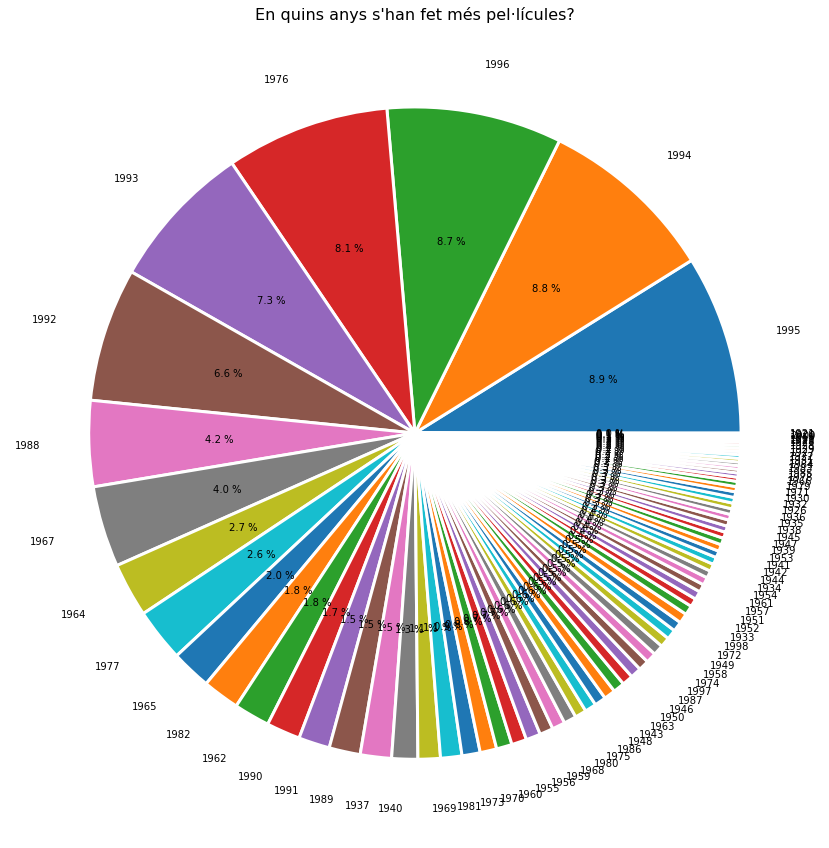

In [17]:
# Ara si, procedeixo a crear la figura
anys = movies["any"].unique() #ho he fet perquè se m'imprmeixin els noms de l'índex sols

plt.figure(figsize=(15,15))

plt.pie(
    data = pelisAny ,
    x = "TotalPelis",
    labels = anys,
    labeldistance=1.15,
    autopct="%0.1f %%", #serveix perquè es faci el percentatge automàtic sobre el gràfic
    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

plt.title("En quins anys s'han fet més pel·lícules?", fontsize=16)


Aquest gràfic ens mostra els percentatges sobre el total de pel·lícules que s'han fet cada any. Podem deduir a primera vista que els últims 10 anys s'han fet més del 50% del total de totes les pel·lícules, cosa que ens fa afirmar que la producció cinematogràfia és creixent i cada vegada tenim més varietat.

<div class="alert alert- alert-info">

***
  \begin{align*}MATRIX PLOTS\end{align*}
   
    
***

Per seguir treballant amb el dataset, convertiré els 0 de les columnes de les categories en NaN's i així no els tindré tant en compte.

In [22]:
moviesNAN = movies.replace(['0',0], np.nan)
print(moviesNAN)

                             titol   any                     categoria  \
0                       Toy Story   1995   Animation|Children's|Comedy   
1                         Jumanji   1995  Adventure|Children's|Fantasy   
2                Grumpier Old Men   1995                Comedy|Romance   
3               Waiting to Exhale   1995                  Comedy|Drama   
4     Father of the Bride Part II   1995                        Comedy   
...                            ...   ...                           ...   
3878             Meet the Parents   2000                        Comedy   
3879          Requiem for a Dream   2000                         Drama   
3880                    Tigerland   2000                         Drama   
3881             Two Family House   2000                         Drama   
3882               Contender, The   2000                Drama|Thriller   

      Children's  Animation  War  Mystery  Film-Noir  Romance  Comedy  ...  \
0            1.0        1.0  NaN 

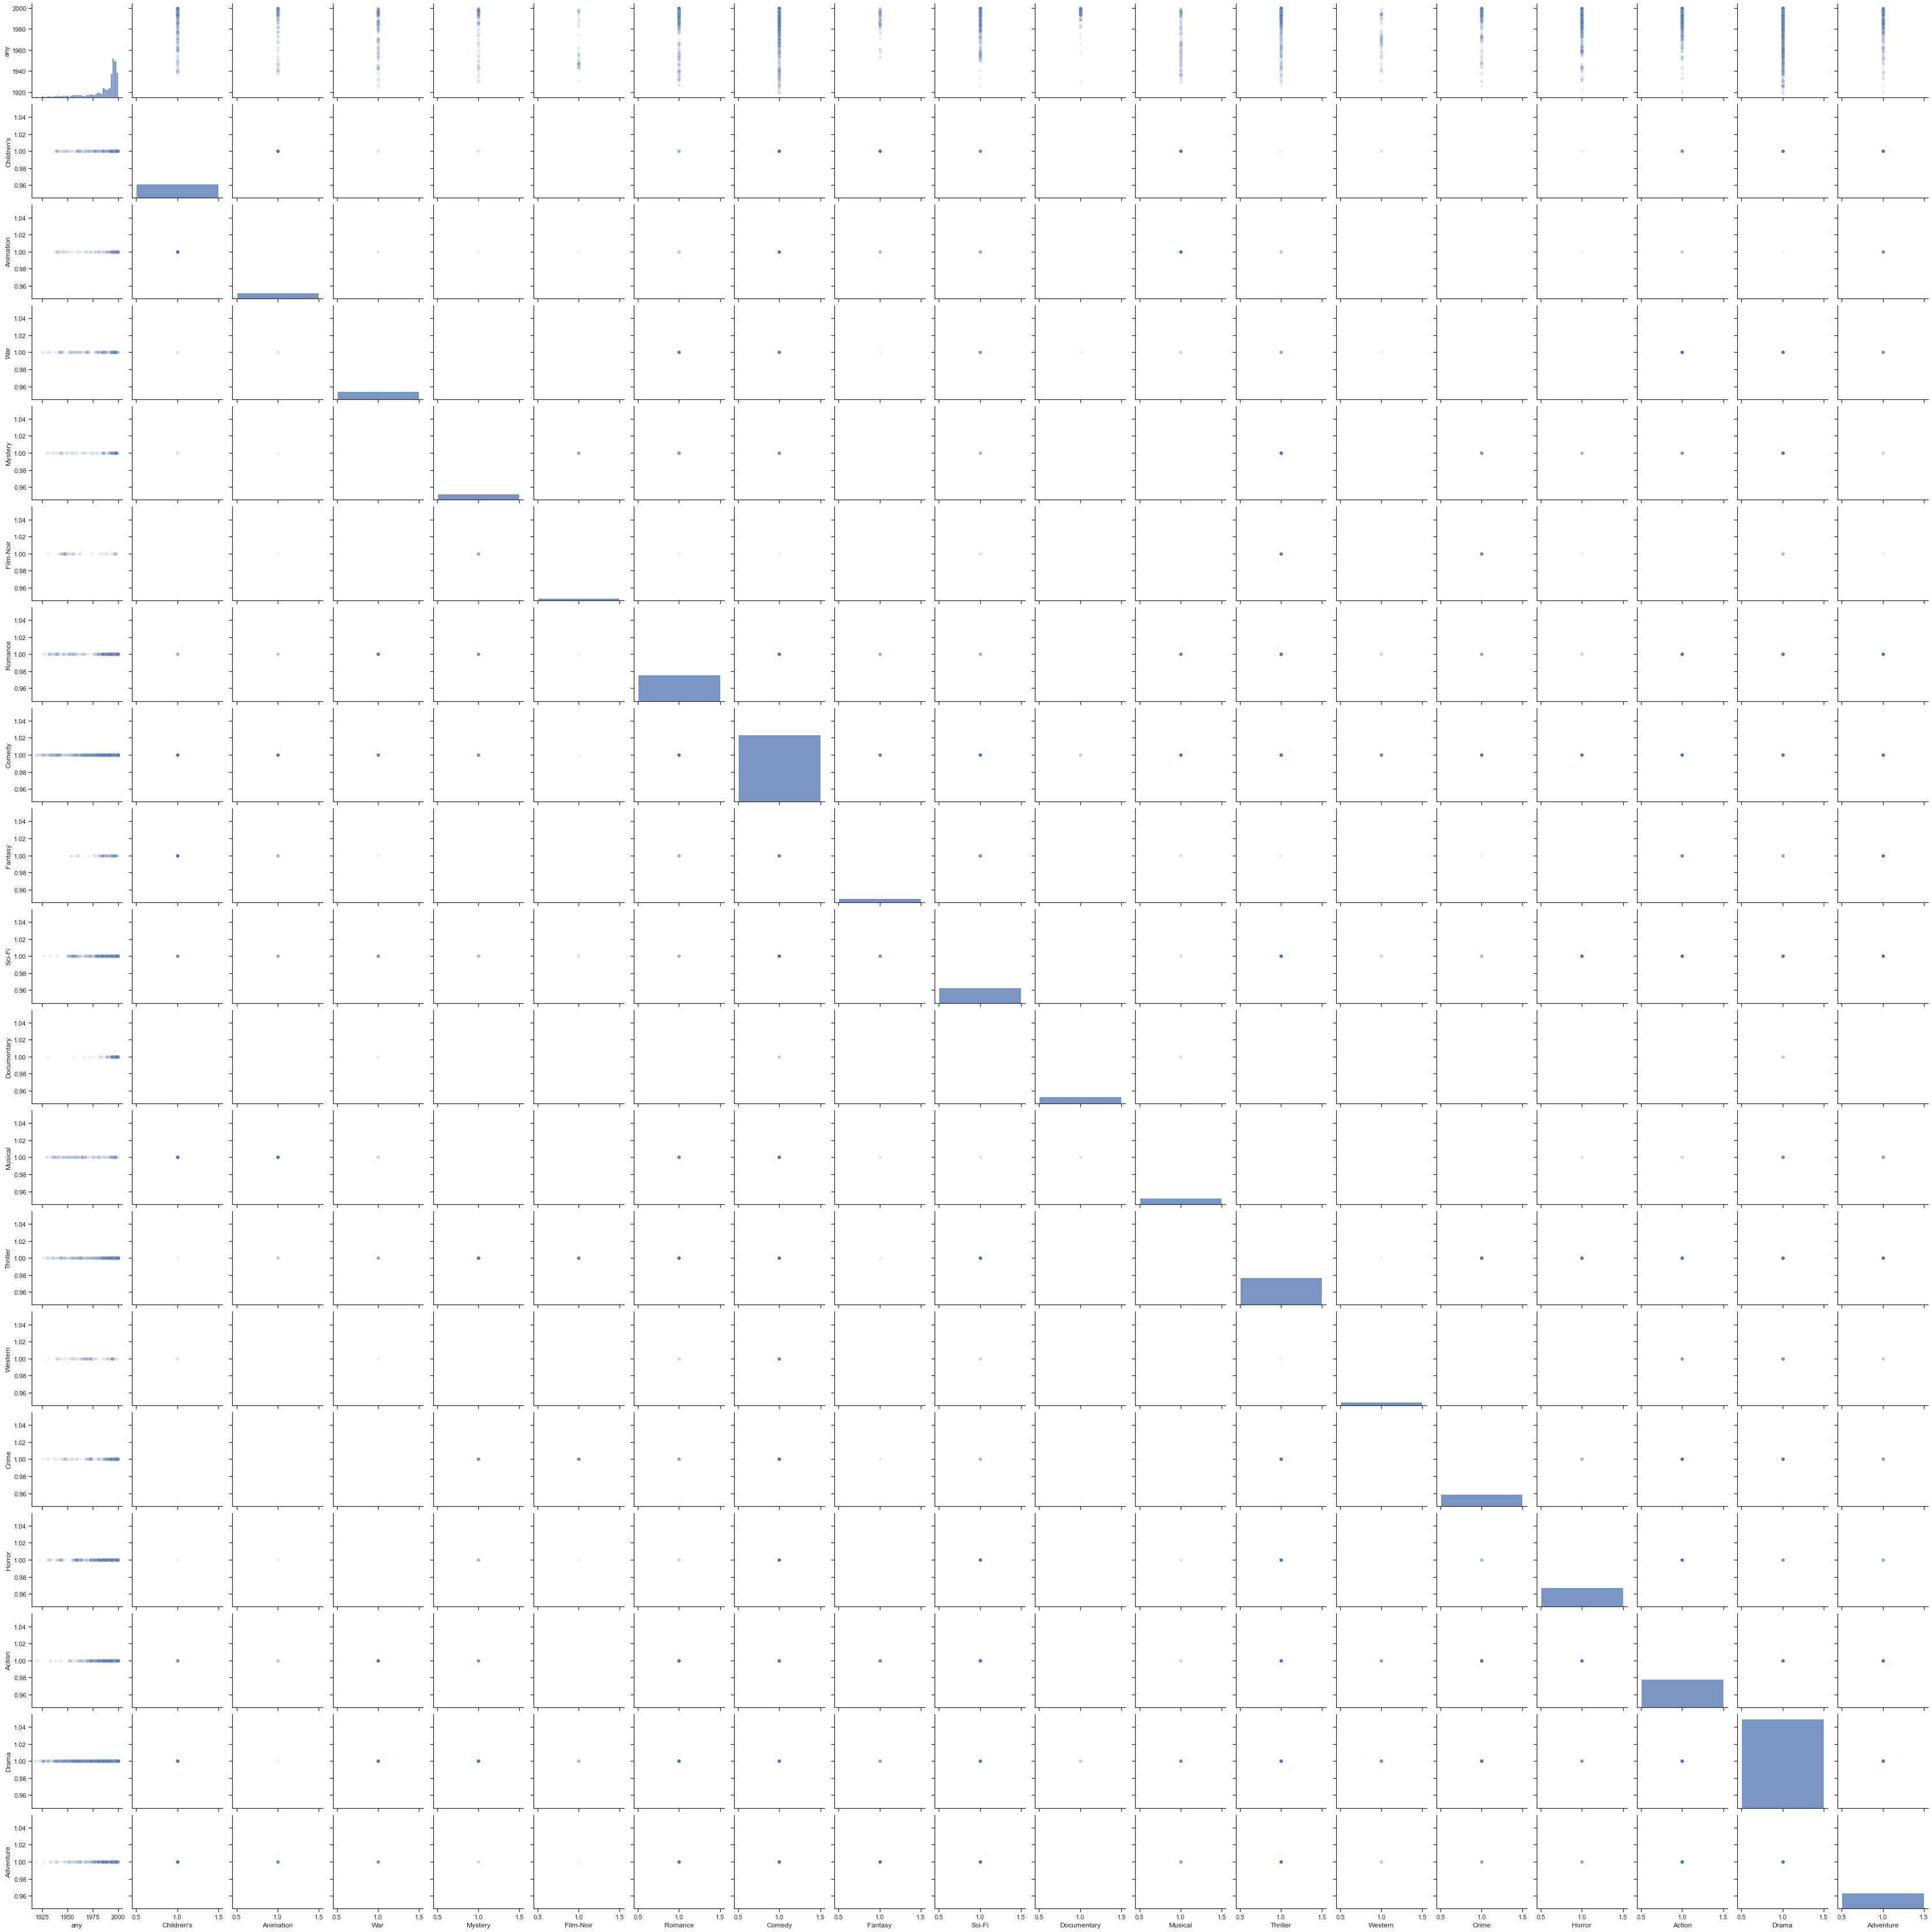

In [26]:
# Comparació gràfica de totes les columnes contra totes les columnes

sns.pairplot(
    data=moviesNAN, 
    diag_kind='hist',
    plot_kws={'alpha': 0.1}) 

<div class="alert alert- alert-info">

***
  \begin{align*}HISTOGRAMS\end{align*}
   
    
***

La diferència bàsica entre Scatterplots i <span style=color:red>Histogrames</span> és que els primers ens marquen punt per punt, o valor per valor, per tant, són molt útils en datasets petits, en canvi, els histogrames, al agrupar els valors en barres, permeten analitzar datasets molts més grans.

Text(0.5, 0, 'Any')

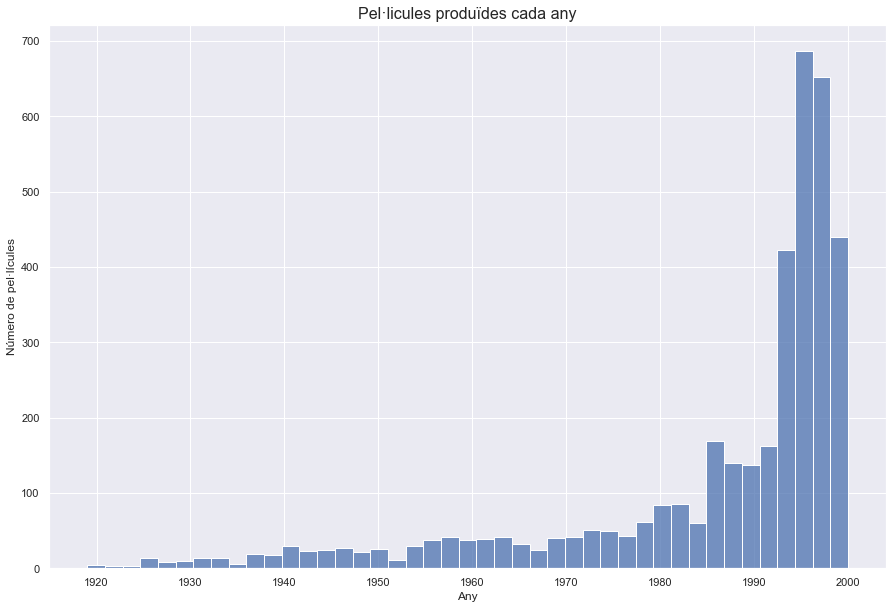

In [42]:
# En aquest histograma volem saber si en aquest restaurant hi van més dones o més homes
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")

sns.histplot(data=moviesNAN, 
             x= "any")

plt.title("Pel·licules produïdes cada any", fontsize=16)
plt.ylabel("Número de pel·lícules")
plt.xlabel("Any")

En aquest gràfic veiem representat el mateix que al gràfic de Pie, quantes pel·lícules es fan cada any. Corroborem el mateix, com més al 2000 ens acostem, més producció de pel·lícules hi ha, sobretot a la dècada dels 90.

<div class="alert alert- alert-info">

***
  \begin{align*}MEDIAN \: - \: MEDIANA - MITJANA\end{align*}
   
    
***

La <span style=color:red>Mediana</span> és el número que divideix els valors en 50% per sota i 50% per sobre. 
Quan el dataset és senar, la mediana és exactament el valor del percentil 50, però si el dataset és parell, s'agafen els dos valors més, es fa la seva mitjana i així obtenim la mediana.

La podem veure en el resum que ens fa el codi "describe" o amb una funció pròpia de python.


In [27]:
# Si imprimim el dataset amb describe(), la mediana correspon a la fila 50%
moviesNAN.describe()


,any,Children's,Animation,War,Mystery,Film-Noir,Romance,Comedy,Fantasy,Sci-Fi,Documentary,Musical,Thriller,Western,Crime,Horror,Action,Drama,Adventure
count,3883.000000,251.0,105.0,143.0,106.0,44.0,471.0,1200.0,68.0,276.0,127.0,114.0,492.0,68.0,211.0,343.0,503.0,1603.0,283.0
mean,1986.066959,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,16.895690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1919.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1982.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1994.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1997.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,2000.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [45]:
# Si utilitzem la fòrmula de python, es faria així
mediana = moviesNAN["any"].median()
print("La mediana de la columna any és", mediana)

La mediana de la columna any és 1994.0


<div class="alert alert- alert-info">

***
  \begin{align*}MEAN - MITJANA\end{align*}
   
    
***

La <span style=color:red>Mitjana</span> ens ajuda a saber on és el centre de la distribució dels valors. Per trobar-la, hem de sumar tots els valors i dividir-los per la quantitat de valors.
Per exemple, si ens fixem en la columa "any", hauriem de sumar tots els valors i dividir-los pel número total:

\begin{align*}\bar{x}\:=\:\frac{1919\:+\:...\:+\:2000}{3883}\:=\: 1986\end{align*}

In [47]:
# Tenim el següent codi que ens permet calcular-la de forma automàtica

mitjana = moviesNAN["any"].mean()

print("La mitjana de tots els anys introduïts és ", mitjana )

La mitjana de tots els anys introduïts és  1986.0669585372134


<div class="alert alert- alert-info">

***
  \begin{align*}VARIANÇA \end{align*}
   
    
***

La variança i la desviació estàndard són dues mesures de variabilitat molt importants en la ciència de dades.

La distància d'un valor amb la mitjana del grup de valors és el que es coneix com a <span style=color:red>desviació</span>.

La fòrmula és (agafant com a exemple el primer número de la columna "any" amb la mitjana calculada anteriorment):

\begin{align*}x_1 − \bar{x} = 1995 − 1986.066 = 8.9330 \end{align*}

In [48]:
# Escrit d'una altra forma seria així:

desviacio = (moviesNAN["any"][0] - mitjana)
print(moviesNAN["any"][0]) #posició 1 de la columna
print("La desviació és de ", desviacio)

1995
La desviació és de  8.933041462786605


Si agafem la desviació de tots els valors de la columna i els elevem al quadrat, i després en fem la mitjana, tenim com a resultat la <span style=color:red>variança</span>

\begin{align*}s^2\:=\:\frac{(8.933)^2 + · · · + (13.933)^2}{3883} = 285.390\end{align*}

Per sort, tenim un mètode de Numpy que ens permet fer aquest càlcul de forma automàtica

In [49]:
variança = np.var(moviesNAN["any"])
print("La variança és ",variança)

La variança és  285.3908294566818


La variança ens permet dues coses:
    - Fa que els valors siguin més grans que els originals
    - Elimina qualsevol número negatiu
     
La variança és aproximadament, la distancia mitjana al quadrat de la mitjana

<div class="alert alert- alert-info">

***
  \begin{align*}DESVIACIÓ  \:\:  ESTÀNDARD\end{align*}
   
    
***

La <span style=color:red>desviació estàndard</span> és un nombre que descriu la distribució dels valors. Si la desviació estàndard és baixa, significa que la majoria dels nombres estan a prop de la mitjana. En canvi, si és alta significa que els valors es distribueixen en un rang més ampli.

La desviació estàndard és l'arrel quadrada de la variança:

\begin{align*}s = \sqrt{285.390} = 16.8935\end{align*}

I la llibreria de Numpy també ens dóna un codi per a fer el càlcul automàtic:

In [50]:
desvEstandar = np.std(moviesNAN["any"])
print("La desviació estandar és ",desvEstandar)

La desviació estandar és  16.893514419938846


<div class="alert alert- alert-info">

***
  \begin{align*}BOX  \:\:  PLOTS\end{align*}
   
    
***

Creació d'una figura <span style=color:red>Box Plot</span>:
- Dibuixar una línia fosca que representi la mediana
- Dibuixar un rectangle que representi el 50% dels valors del mig del dataset. La longitud d'aquesta caixa s'anomena rang interquartil (IQR). 
L' <span style=color:red>IQR</span> és una altra mesura de variabilitat i com la desviació estàndard, com més variables siguin les dades, més gran serà l'IQR. Els dos límits del quadre s'anomenen percentil 25 (o primer quartil) i percentil 75 (o tercer quartil). Així doncs, l'IQR és la diferència entre aquests dos quartils, anomenats Q1(primer quartil) i Q3 (tercer quartil)

$$IQR = Q3 − Q1$$

- Fora de la caix, s'estenen dues línies que s'anomenen bigotis (whiskers) i el seu abast sempre ha de ser com a màxim de 1,5 vegades l'IQR. Si alguns valors sobrepassen aquesta distància, solen ser puntuals i apareixen com un punt al dibuix. L'objectiu de fer aquests punts en comptes d'allargar els bigotis és detectar i estudiar valors que s'allunyen de forma inusual de la resta de dades, i s'anomenen "outliers"


Text(0, 0.5, 'Any')

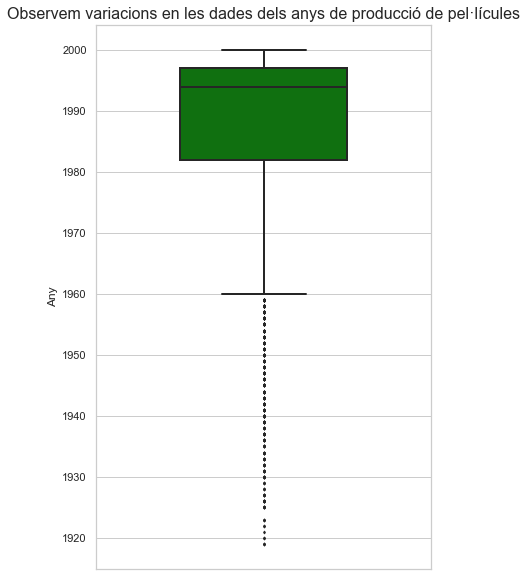

In [52]:
# Exemple d'un box plot amb la columna de dades "any"

sns.set(style="whitegrid")
plt.figure(figsize=(6, 10)) #canviar tamany figura
sns.boxplot(data = moviesNAN,
                 y= "any",
                 color='green',
                 fliersize=2, # mida dels outliers
                 orient='v', # orientació vertical de la caixa
                 linewidth=2 , # gruix de la línia de la caixa
                 width=0.5) # amplada de la caixa

plt.title("Observem variacions en les dades dels anys de producció de pel·lícules", fontsize=16)
plt.ylabel("Any")


<AxesSubplot:ylabel='any'>

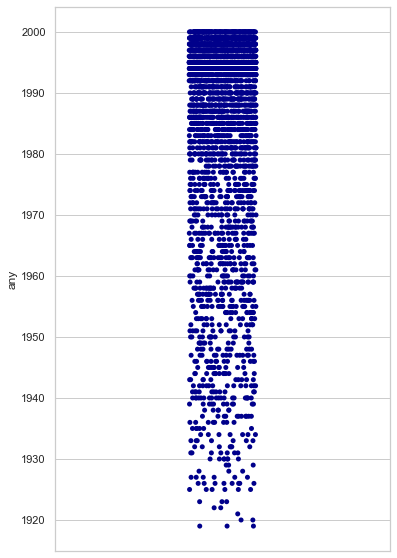

In [53]:
# Podem colocar tots els valors de la columna en un stripplot

sns.set(style="whitegrid")
plt.figure(figsize=(6, 10)) #canviar tamany figura

sns.stripplot(data = moviesNAN,
              y= "any",
              orient='v', 
              color='darkblue')

Text(0, 0.5, 'Any')

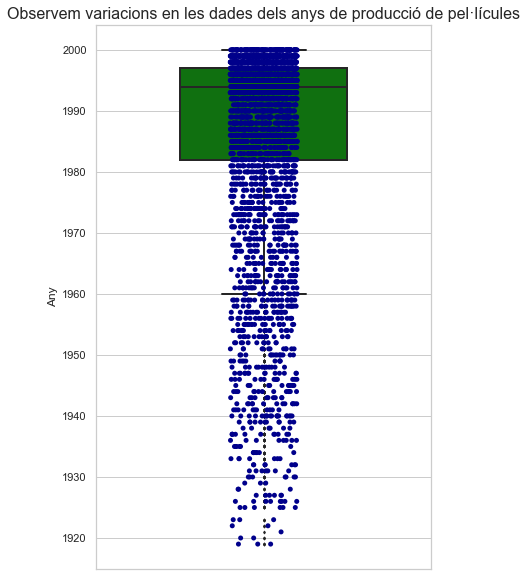

In [54]:
# I si ajuntem el box plot i l'stripplot obtenim el següent:


sns.set(style="whitegrid")
plt.figure(figsize=(6, 10)) #canviar tamany figura
sns.boxplot(data = moviesNAN,
                 y= "any",
                 color='green',
                 fliersize=2, # mida dels outliers
                 orient='v', # orientació vertical de la caixa
                 linewidth=2 , # gruix de la línia de la caixa
                 width=0.5) # amplada de la caixa
sns.stripplot(data = moviesNAN,
              y= "any",
              orient='v', 
              color='darkblue')

plt.title("Observem variacions en les dades dels anys de producció de pel·lícules", fontsize=16)
plt.ylabel("Any")



Què podem llegir d'aquest box plot? Doncs que el tercer quartil és molt més concorregut que el primer, que hi ha molts outliners per la part inferior, cosa que vol dir que la producció es va concentrar molt a finals dels anys 90 i en canvi al principi es feien molt poques pel·lícules.

## NIVELL 3
### Exercici 3: En aquest exercici no us donarem gaires indicacions perquè volem que ens mostreu la vostra creativitat. Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.